<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/First_Example_of_a_CNN_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras import utils

import matplotlib.pyplot as plt



In [2]:
import matplotlib as mpl
mpl.style.use('classic')

## Model

In [3]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170498071/170498071 [==============================] - 71s 0us/step


In [5]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [6]:
nClasses = 10
y_train = utils.to_categorical(y_train,nClasses)
y_test = utils.to_categorical(y_test,nClasses)

In [7]:
x_train.shape[1:]

(32, 32, 3)

In [8]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [9]:
K.clear_session()
model = createModel()

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-02-02 17:26:29.114258: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-02 17:26:29.114766: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
AdamOpt = Adam(learning_rate=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [12]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


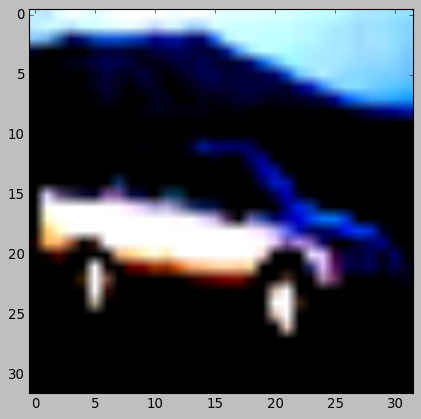

In [13]:
plt.imshow(x_train[4])

In [14]:
batch_size = 256
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))

Epoch 1/10


2023-02-02 17:26:29.957726: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-02 17:26:30.216023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 1.7942 - accuracy: 0.3277

2023-02-02 17:26:37.343353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 8s 27ms/step - loss: 1.7942 - accuracy: 0.3277 - val_loss: 1.3938 - val_accuracy: 0.4860
Epoch 2/10
196/196 [==============================] - 5s 23ms/step - loss: 1.3572 - accuracy: 0.5043 - val_loss: 1.1807 - val_accuracy: 0.5713
Epoch 3/10
196/196 [==============================] - 4s 23ms/step - loss: 1.1603 - accuracy: 0.5836 - val_loss: 1.0756 - val_accuracy: 0.6202
Epoch 4/10
196/196 [==============================] - 4s 23ms/step - loss: 1.0380 - accuracy: 0.6307 - val_loss: 0.9505 - val_accuracy: 0.6571
Epoch 5/10
196/196 [==============================] - 4s 22ms/step - loss: 0.9521 - accuracy: 0.6640 - val_loss: 0.8674 - val_accuracy: 0.6922
Epoch 6/10
196/196 [==============================] - 4s 22ms/step - loss: 0.8856 - accuracy: 0.6868 - val_loss: 0.8470 - val_accuracy: 0.7013
Epoch 7/10
196/196 [==============================] - 4s 22ms/step - loss: 0.8232 - accuracy: 0.7093 - val_loss: 0.7752 - val_accuracy: 0.7324
Epoch 8/10

In [15]:
history.history

{'loss': [1.7941938638687134,
  1.3572208881378174,
  1.1602959632873535,
  1.037954330444336,
  0.9521394968032837,
  0.8855779767036438,
  0.8231690526008606,
  0.7788795828819275,
  0.7330242395401001,
  0.706181526184082],
 'accuracy': [0.3277200162410736,
  0.5042800307273865,
  0.5836400389671326,
  0.6306800246238708,
  0.6639600396156311,
  0.6868200302124023,
  0.7093000411987305,
  0.7250200510025024,
  0.740820050239563,
  0.7519800662994385],
 'val_loss': [1.3938028812408447,
  1.180749773979187,
  1.0755653381347656,
  0.95054692029953,
  0.8674217462539673,
  0.8470496535301208,
  0.7752072811126709,
  0.7429996728897095,
  0.6957669258117676,
  0.7031302452087402],
 'val_accuracy': [0.48600003123283386,
  0.5713000297546387,
  0.6202000379562378,
  0.6571000218391418,
  0.6922000050544739,
  0.7013000249862671,
  0.7324000597000122,
  0.7412000298500061,
  0.7588000297546387,
  0.7569000124931335]}

Text(0, 0.5, 'Loss')

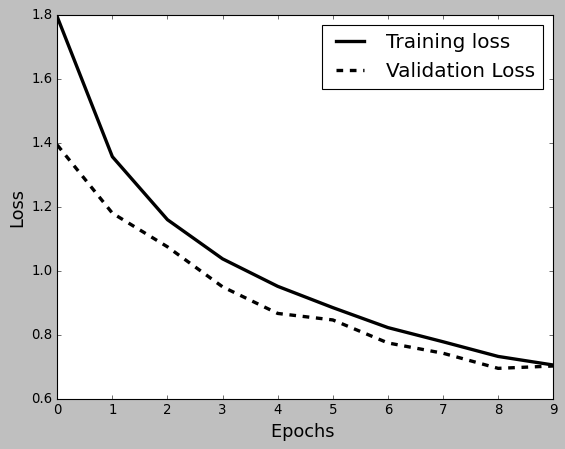

In [16]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)


Text(0, 0.5, 'Accuracy')

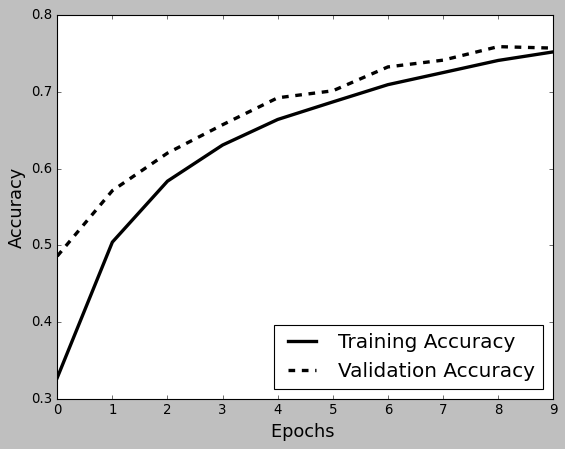

In [17]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)
